In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [2]:
image_generator = ImageDataGenerator(rescale=1.0/255, validation_split=0.3)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='../input/blood-cells-image-dataset/bloodcells_dataset',
                                                 target_size=(300, 300),  
                                                 subset="training",
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 classes=('basophil', 
                                                          'eosinophil', 
                                                          'erythroblast', 
                                                          'ig', 
                                                          'lymphocyte', 
                                                          'monocyte', 
                                                          'neutrophil', 
                                                          'platelet')
                                                 )

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory='../input/blood-cells-image-dataset/bloodcells_dataset',
                                                 target_size=(300, 300), 
                                                 subset="validation",
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 classes=('basophil', 
                                                          'eosinophil', 
                                                          'erythroblast', 
                                                          'ig', 
                                                          'lymphocyte', 
                                                          'monocyte', 
                                                          'neutrophil', 
                                                          'platelet')
                                                )
                                                

Found 11967 images belonging to 8 classes.
Found 5125 images belonging to 8 classes.


In [3]:
argmax_to_string = {
                     0: 'basophil',
                     1: 'eosinophil',
                     2: 'erythroblast',
                     3: 'ig',
                     4: 'lymphocyte',
                     5: 'monocyte',
                     6: 'neutrophil',
                     7: 'platelet'
                   }

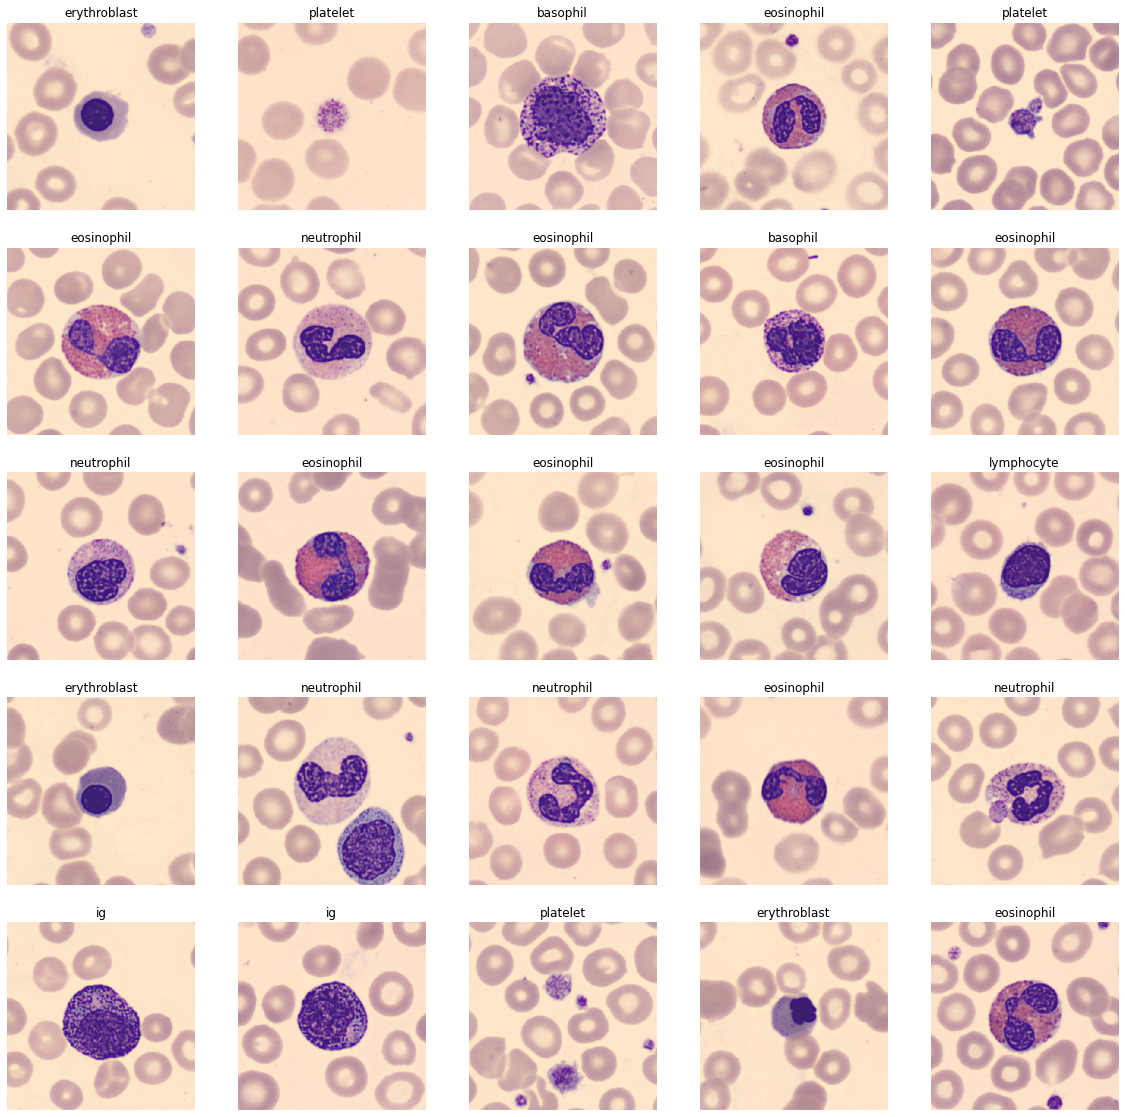

In [4]:
plt.figure(figsize=(20, 20))
plot_dim = 5
counter = 1

for img in train_dataset:
    plt.subplot(plot_dim, plot_dim, counter)
    plt.axis('off')
    plt.imshow(img[0][0]) # only one image of (plot_dim*plot_dim)th firsts batchs
    plt.title(argmax_to_string[np.argmax(img[-1])])
    
    if counter >= plot_dim**2:
        break
    else:
        counter += 1

In [5]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(300, 300, 3)))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape = (300, 300, 3)))
model.add(keras.layers.MaxPooling2D(2, padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(8, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#85pct

2022-07-19 05:36:36.449921: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-19 05:36:36.592663: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-19 05:36:36.593443: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-19 05:36:36.595195: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 720000)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                46080064  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
Total params: 46,085,640
Trainable params: 46,085,640
Non-trainable params: 0
____________________________________________

node zero
2022-07-19 05:36:36.596444: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-19 05:36:36.597321: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-19 05:36:38.806904: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-19 05:36:38.807725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-19 05:36:38.808410: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node r

In [6]:
model.fit(train_dataset, epochs=15, validation_data=validation_dataset)

2022-07-19 05:36:39.654248: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-07-19 05:36:41.196025: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


374/374 [==============================] - 135s 343ms/step - loss: 2.0930 - accuracy: 0.5808 - val_loss: 0.9558 - val_accuracy: 0.6423
Epoch 2/15
374/374 [==============================] - 86s 231ms/step - loss: 0.6590 - accuracy: 0.7642 - val_loss: 0.6993 - val_accuracy: 0.7559
Epoch 3/15
374/374 [==============================] - 84s 225ms/step - loss: 0.4557 - accuracy: 0.8385 - val_loss: 0.7174 - val_accuracy: 0.7534
Epoch 4/15
374/374 [==============================] - 86s 229ms/step - loss: 0.3313 - accuracy: 0.8854 - val_loss: 0.6505 - val_accuracy: 0.7719
Epoch 5/15
374/374 [==============================] - 86s 229ms/step - loss: 0.2235 - accuracy: 0.9247 - val_loss: 0.5867 - val_accuracy: 0.8127
Epoch 6/15
374/374 [==============================] - 83s 223ms/step - loss: 0.1629 - accuracy: 0.9464 - val_loss: 0.5885 - val_accuracy: 0.8094
Epoch 7/15
374/374 [==============================] - 84s 224ms/step - loss: 0.1388 - accuracy: 0.9550 - val_loss: 0.6064 - val_accuracy: 0.

In [7]:
print(model.history.history)

{'loss': [2.092987537384033, 0.658989667892456, 0.45567530393600464, 0.33129653334617615, 0.223514124751091, 0.16291111707687378, 0.1387501209974289, 0.08945786207914352, 0.07807383686304092, 0.049880851060152054, 0.03478078171610832, 0.11019964516162872, 0.03845176100730896, 0.015303284861147404, 0.00980230700224638], 'accuracy': [0.5807637572288513, 0.764184832572937, 0.8384724855422974, 0.8854349255561829, 0.9247096180915833, 0.9464360475540161, 0.9549594521522522, 0.9711707234382629, 0.9755160212516785, 0.9837051630020142, 0.9888025522232056, 0.9634829163551331, 0.9882175922393799, 0.9959053993225098, 0.997660219669342], 'val_loss': [0.955771803855896, 0.6993086338043213, 0.7173622250556946, 0.6505162715911865, 0.5866961479187012, 0.5884757041931152, 0.606438159942627, 0.6010267734527588, 0.591012716293335, 0.5860216021537781, 1.8283004760742188, 0.7169854640960693, 0.6351388096809387, 0.7462276816368103, 0.8541877865791321], 'val_accuracy': [0.6423414349555969, 0.7559024095535278,

In [8]:
min_loss_train = min(model.history.history['loss'])
min_loss_val = min(model.history.history['val_loss'])
                
max_accuracy_train = max(model.history.history['accuracy'])
max_accuracy_val = max(model.history.history['val_accuracy'])


print('Mininum of loss value from training dataset: ', round(min_loss_train, 4))
print('Mininum of loss value from validation dataset: ', round(min_loss_val, 4))
print()
print('Max accuracy from training dataset: ', round(max_accuracy_train*100, 2), '%')
print('Max accuracy from training dataset: ', round(max_accuracy_val*100, 2), '%')

Mininum of loss value from training dataset:  0.0098
Mininum of loss value from validation dataset:  0.586

Max accuracy from training dataset:  99.77 %
Max accuracy from training dataset:  84.39 %


Text(0, 0.5, 'Loss function value')

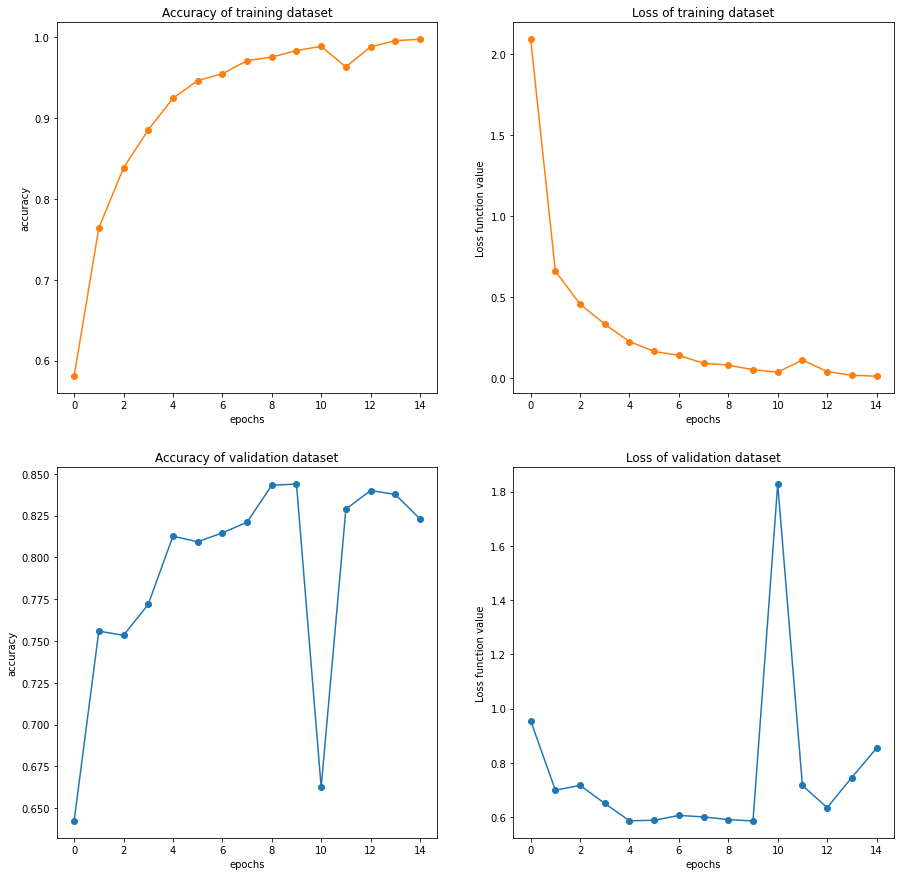

In [9]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(model.history.history['accuracy'], color='tab:orange', marker='o')
plt.title('Accuracy of training dataset')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(2, 2, 2)
plt.plot(model.history.history['loss'], color='tab:orange', marker='o')
plt.title('Loss of training dataset')
plt.xlabel('epochs')
plt.ylabel('Loss function value')

plt.subplot(2, 2, 3)
plt.plot(model.history.history['val_accuracy'], color='tab:blue', marker='o')
plt.title('Accuracy of validation dataset')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(2, 2, 4)
plt.plot(model.history.history['val_loss'], color='tab:blue', marker='o')
plt.title('Loss of validation dataset')
plt.xlabel('epochs')
plt.ylabel('Loss function value')


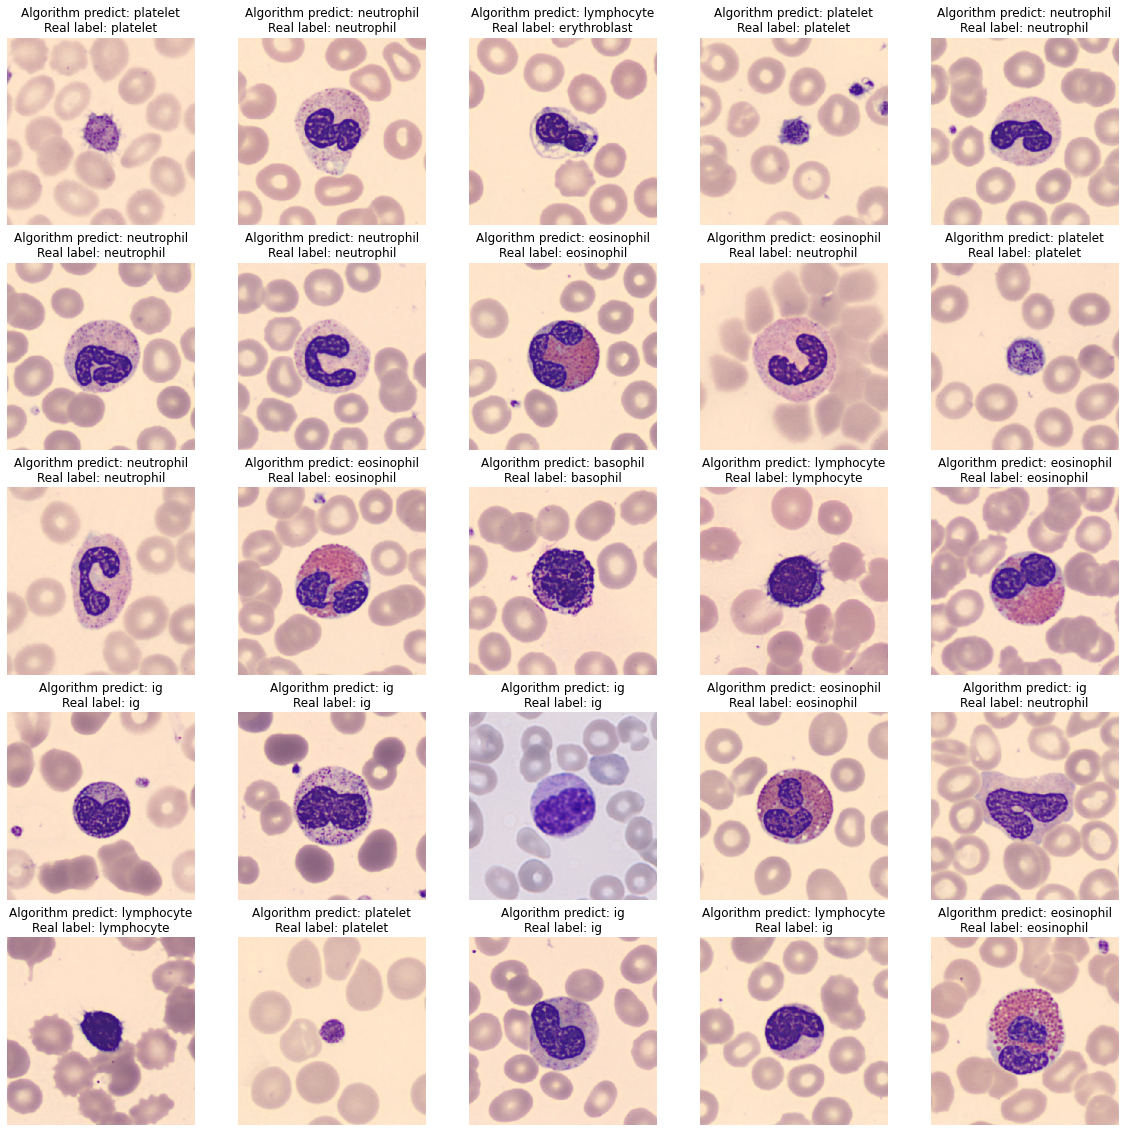

In [10]:
plt.figure(figsize=(20, 20))
plot_dim = 5
counter = 1

for img in validation_dataset:
    plt.subplot(plot_dim, plot_dim, counter)
    plt.axis('off')
    plt.imshow(img[0][0]) # only one image of (plot_dim*plot_dim)th firsts batchs
    predict = argmax_to_string[np.argmax(model.predict(img[0])[0])]
    real_label = argmax_to_string[np.argmax(img[-1])]

    plt.title(f'Algorithm predict: {predict}\nReal label: {real_label}')
    
    if counter >= plot_dim**2:
        break
    else:
        counter += 1